# Wine quality

In [1]:
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
red_dataset = pd.read_csv(r'C:\Users\giovanni\Desktop\datasets\wine_quality\winequality-red.csv', sep=';')
red_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32
def detect_outliers(data):
    outliers = []
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [4]:
def summary_table(dataset):
    mean = []
    median = []
    variance = []
    std_dev = []
    outliers_number = []
    outliers_values = []
    for column in list(dataset):
        mean.append(st.mean(dataset[column][:]))
        median.append(st.median(dataset[column][:]))
        variance.append(st.variance(dataset[column][:]))
        std_dev.append(st.stdev(dataset[column][:]))
        outliers_number.append(len(detect_outliers(dataset[column][:])))
        outliers_values.append(detect_outliers(dataset[column][:]))
    dataset_dic = {}
    dataset_dic['mean'] = mean
    dataset_dic['median'] = median
    dataset_dic['variance'] = variance
    dataset_dic['standard_deviation'] = std_dev
    dataset_dic['outliers_number'] = outliers_number
    dataset_dic['outliers_values'] = outliers_values
    summary_dataframe = pd.DataFrame(dataset_dic)
    summary_dataframe.index = list(dataset)
    return summary_dataframe

In [5]:
summary_dataset = summary_table(red_dataset)
summary_dataset

,mean,median,variance,standard_deviation,outliers_number,outliers_values
fixed acidity,8.319637,7.90000,3.031416,1.741096,12,"[15.0, 15.0, 13.8, 14.0, 13.7, 13.7, 15.6, 14...."
volatile acidity,0.527821,0.52000,0.032062,0.179060,10,"[1.13, 1.07, 1.33, 1.33, 1.09, 1.24, 1.185, 1...."
citric acid,0.270976,0.26000,0.037947,0.194801,1,[1.0]
residual sugar,2.538806,2.20000,1.987897,1.409928,30,"[10.7, 7.3, 7.2, 7.0, 11.0, 11.0, 7.9, 7.9, 15..."
chlorides,0.087467,0.07900,0.002215,0.047065,31,"[0.368, 0.341, 0.332, 0.46399999999999997, 0.4..."
free sulfur dioxide,15.874922,14.00000,109.414884,10.460157,22,"[52.0, 51.0, 50.0, 68.0, 68.0, 54.0, 53.0, 52...."
total sulfur dioxide,46.467792,38.00000,1082.102373,32.895324,15,"[148.0, 153.0, 165.0, 151.0, 149.0, 147.0, 148..."
density,0.996747,0.99675,0.000004,0.001887,18,"[1.0032, 1.0026, 1.00315, 1.00315, 1.00315, 1...."
pH,3.311113,3.31000,0.023835,0.154386,8,"[3.9, 3.85, 2.74, 3.9, 3.78, 3.78, 4.01, 4.01]"
sulphates,0.658149,0.62000,0.028733,0.169507,27,"[1.56, 1.28, 1.2, 1.28, 1.95, 1.22, 1.95, 1.98..."


summary_dataset

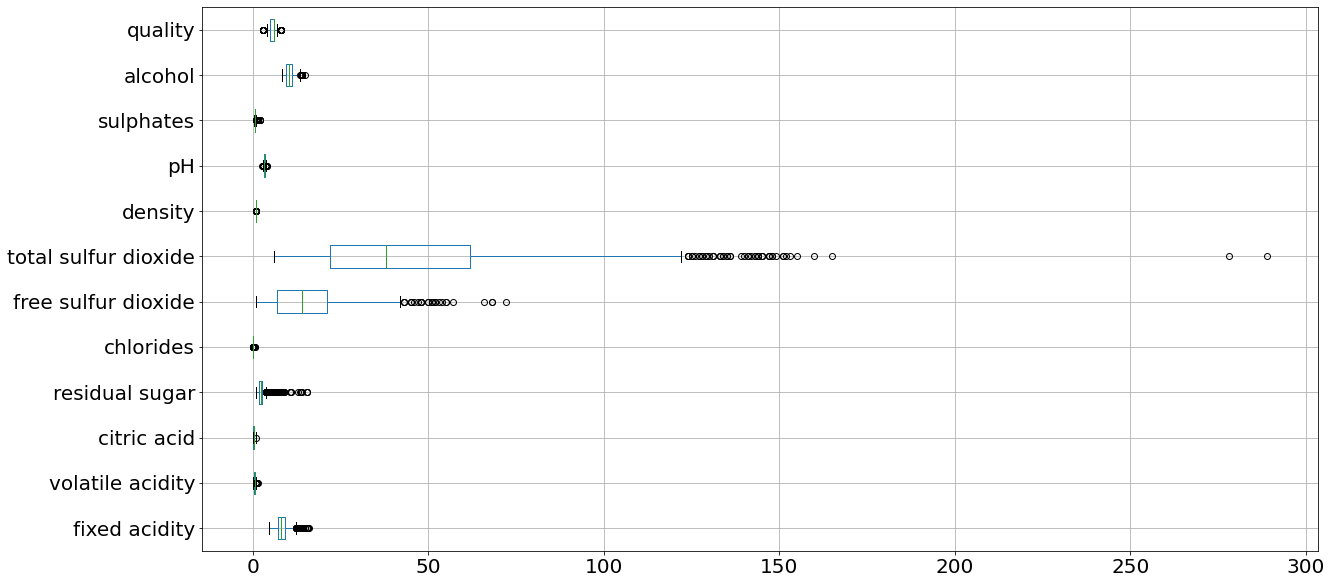

In [69]:
lista_colonne = list(red_dataset)
plt.figure(figsize=(20,10))
red_dataset.boxplot(column = lista_colonne[0:11], vert=False, fontsize=20)
plt.show()

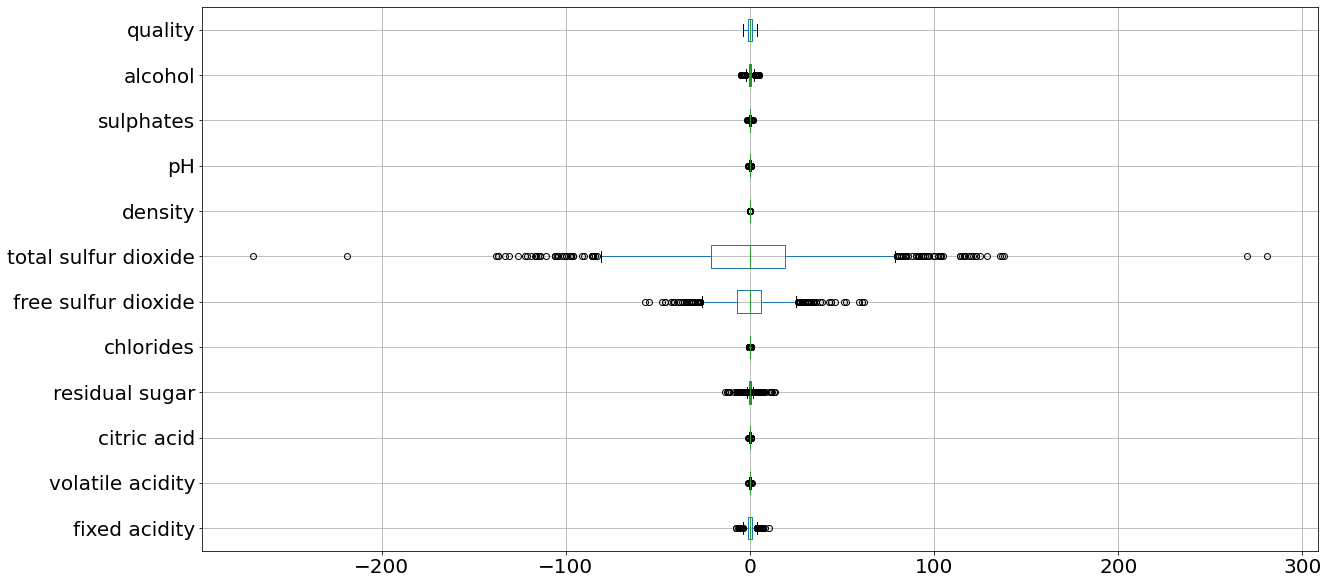

In [64]:
plt.figure(figsize=(20,10))
red_dataset.diff().boxplot(vert=False,fontsize=20)
plt.show()

In [24]:
red_dataset['quality'][:]
list(red_dataset)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [28]:
len(list(red_dataset))

12